In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_blobs = pd.read_csv('blobs.csv')
df_circle = pd.read_csv('circle.csv')
df_moons = pd.read_csv('moons.csv')

In [34]:
df_circle

,Xcircle_X1,Xcircle_X2
0,0.519781,-0.015981
1,-0.057719,-0.420279
2,-0.805155,-0.662227
3,0.316549,0.312730
4,-0.304804,0.407563
...,...,...
995,-0.222906,-0.326809
996,-0.766648,0.677558
997,-0.012036,0.396755
998,0.398129,0.318982


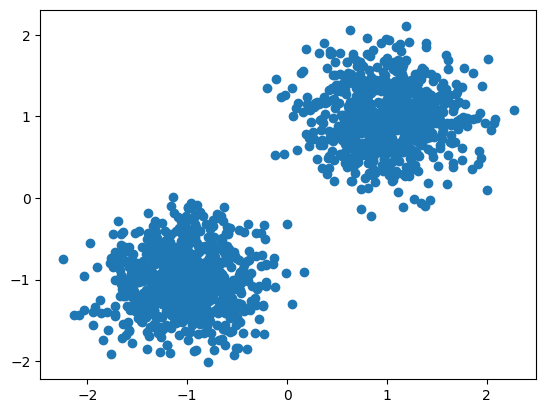

In [4]:
plt.scatter(df_blobs['Xblobs_X1'], df_blobs['Xblobs_X2'])

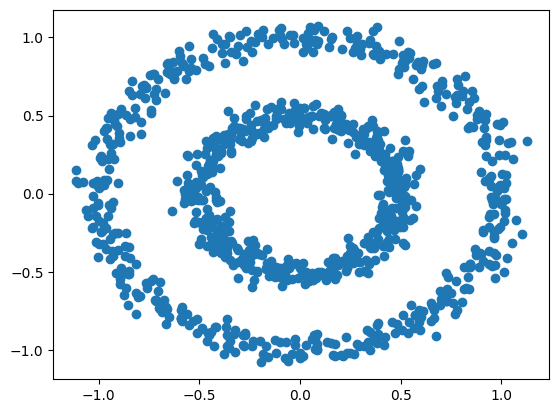

In [5]:
plt.scatter(df_circle['Xcircle_X1'], df_circle['Xcircle_X2'])

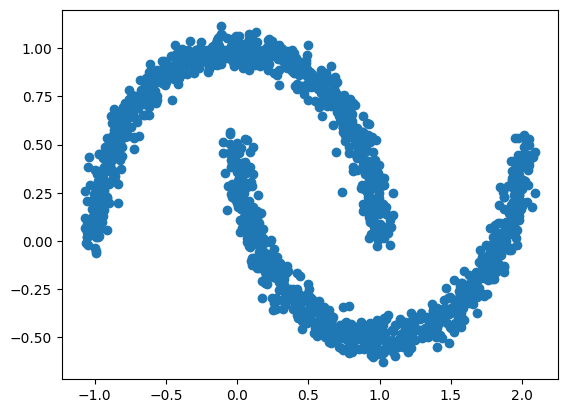

In [6]:
df_moons = pd.read_csv('moons.csv')
plt.scatter(df_moons['Xmoons_X1'], df_moons['Xmoons_X2'])

In [8]:
def euclidean_distances(mat):
    from tqdm import tqdm

    if isinstance(mat, (pd.DataFrame, pd.Series)):
        mat = mat.to_numpy()

    dot_product = np.dot(mat, mat.T)
    xi2 = np.sum(mat**2, axis=1)
    n = len(xi2)
    distances = np.zeros((n, n))

    for i in tqdm(range(n)):
        for j in range(n):
            distances[i, j] = np.sqrt(xi2[i] + xi2[j] - (2 * dot_product[i, j]))

    return distances


# Implementation for moons

In [12]:
def create_neighbors(ep, df):
    dist_matrix = euclidean_distances(df)  

    n = dist_matrix.shape[0]

    neighbors = []

    for i in range(n):
        current_neighbors = np.where(dist_matrix[i] < ep)[0]  
        current_neighbors = ",".join(map(str, current_neighbors.tolist()))  
        neighbors.append(current_neighbors) 

    return np.array(neighbors)

In [25]:
''' Given a single point from the dataframe, this function will traverse all the neigbhours 
 of the given node (until it cannot find new unique neigbhours). '''
 
def dfs(df, node_id, visited, current_cluster):
    if visited[node_id] == 1:
        return df

    df.at[node_id, 'cluster'] = current_cluster
    neigbhours = [int(i) for i in df['neighbors'][node_id].split(',')]
    visited[node_id] = 1

    for neigbhour in neigbhours:
        df = dfs(df, neigbhour, visited, current_cluster)
    
    return df

In [31]:
def dbscan(ep, minpts, df):
    n = df.shape[0]
    neighbors = create_neighbors(ep, df)
    
    df1 = df.copy()
    df1['neighbors'] = neighbors
    df1['cluster'] = np.array([0]*n)

    n = df1.shape[0]
    curr_cluster = 1

    for pt in range(n):
        curr_pt = pt

        if df1.at[curr_pt, 'cluster'] != 0:
            continue
        
        neigbhours = [int(i) for i in df1['neighbors'][curr_pt].split(',')]

        if len(neigbhours)>= minpts:
            df1 = dfs(df1.copy(), curr_pt, np.array([0]*n), curr_cluster)
            curr_cluster+=1
        else:
            for neigbhour in neigbhours:
                if len(neigbhours) >= minpts:
                    df_df1moons1 = dfs(df1.copy(), curr_pt, np.array([0]*n), curr_cluster)
                    curr_cluster += 1 
    return df1
        
df_moons1 = dbscan(0.3, 10, df_moons)
        

  0%|          | 0/1500 [00:00<?, ?it/s]/tmp/ipykernel_35584/2095037290.py:14: RuntimeWarning: invalid value encountered in sqrt
  distances[i, j] = np.sqrt(xi2[i] + xi2[j] - (2 * dot_product[i, j]))
100%|██████████| 1500/1500 [00:04<00:00, 323.99it/s]


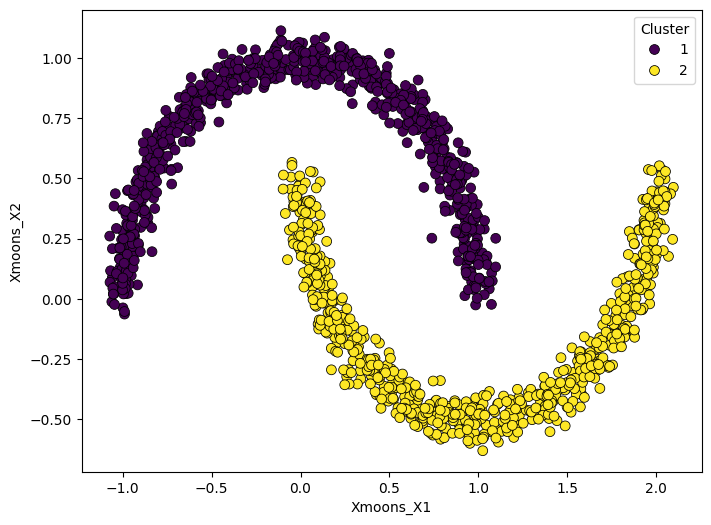

In [32]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df_moons1['Xmoons_X1'], y=df_moons1['Xmoons_X2'], hue=df_moons1['cluster'], palette='viridis', s=50, edgecolor='black')

plt.legend(title="Cluster")



# Implementation for circles

In [45]:
df_circle1 = dbscan(0.1, 10, df_circle)

  0%|          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_35584/2095037290.py:14: RuntimeWarning: invalid value encountered in sqrt
  distances[i, j] = np.sqrt(xi2[i] + xi2[j] - (2 * dot_product[i, j]))
100%|██████████| 1000/1000 [00:02<00:00, 476.69it/s]


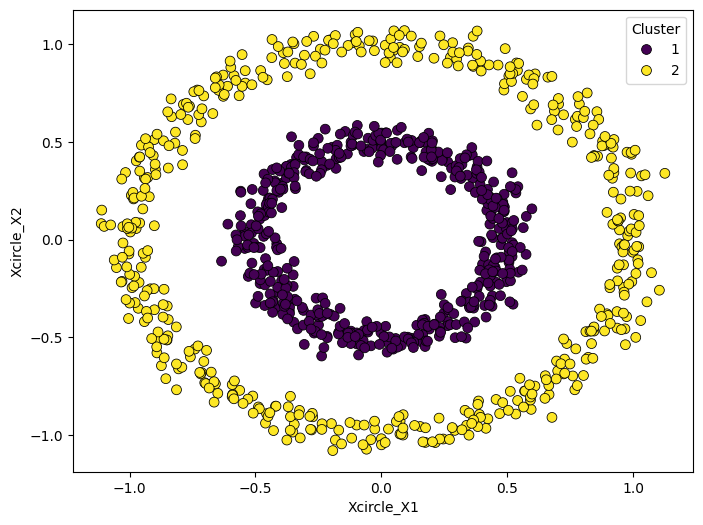

In [46]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df_circle1['Xcircle_X1'], y=df_circle1['Xcircle_X2'], hue=df_circle1['cluster'], palette='viridis', s=50, edgecolor='black')

plt.legend(title="Cluster")



# Implementation for blobs

In [51]:
def dbscan(ep, minpts, df):
    n = df.shape[0]
    neighbors = create_neighbors(ep, df)
    
    df1 = df.copy()
    df1['neighbors'] = neighbors
    df1['cluster'] = np.array([0]*n)

    n = df1.shape[0]
    curr_cluster = 1

    for pt in range(n):
        curr_pt = pt

        if df1.at[curr_pt, 'cluster'] != 0:
            continue
        
        # print(df1['neighbors'][curr_pt].split(','))
        
        if df1['neighbors'][curr_pt].split(',') == ['']:
            continue

        neigbhours = [int(i) for i in df1['neighbors'][curr_pt].split(',')]

        if len(neigbhours)>= minpts:
            df1 = dfs(df1.copy(), curr_pt, np.array([0]*n), curr_cluster)
            curr_cluster+=1
        else:
            for neigbhour in neigbhours:
                if len(neigbhours) >= minpts:
                    df_df1moons1 = dfs(df1.copy(), curr_pt, np.array([0]*n), curr_cluster)
                    curr_cluster += 1 
    return df1
        
        

In [62]:
df_blobs1 = dbscan(0.4, 10, df_blobs)

  0%|          | 0/1500 [00:00<?, ?it/s]/tmp/ipykernel_35584/2095037290.py:14: RuntimeWarning: invalid value encountered in sqrt
  distances[i, j] = np.sqrt(xi2[i] + xi2[j] - (2 * dot_product[i, j]))
100%|██████████| 1500/1500 [00:03<00:00, 423.54it/s]


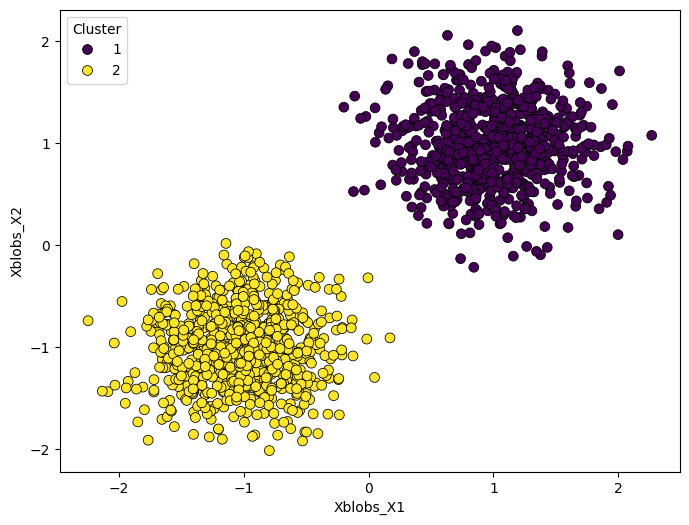

In [63]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df_blobs1['Xblobs_X1'], y=df_blobs1['Xblobs_X2'], hue=df_blobs1['cluster'], palette='viridis', s=50, edgecolor='black')

plt.legend(title="Cluster")

